# Isochronous sequences with target speech stimulus

For this example, we will attempt to recreate the stimuli from the first experiment in [Bosker (2017)](https://link.springer.com/article/10.3758/s13414-016-1206-4#Sec1). 

In [4]:
from thebeat.core import Sequence, SoundStimulus, SoundSequence
import numpy as np

rng = np.random.default_rng(seed=123)

In [5]:
# We suppress warnings, but let's hide that to avoid confusion
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Introduction
In the first experiment in that paper, the author tested whether the tempo of a sequence of pure tones changes the perception of a subsequently presented speech sound that was somewhere in between /ɑs/ and /aːs/. The relevant bits from the method section are replicated here:

> "The stimuli in the experiment consisted of tone precursors followed by target words (see Fig. 1). Four different precursors, each with a total duration of 4 seconds, were created in Praat (Boersma & Weenink, 2012) by crossing two different tone durations (71 vs. 125 ms) with two presentation rates (4 vs. 7 Hz). The fundamental frequency of all pure tones was fixed at 440 Hz, thus avoiding spectral masking of the target vowels’ F0, F1, and F2. "

Replicated from [Bosker (2017)](https://link.springer.com/article/10.3758/s13414-016-1206-4#Sec1)

---

## Making the sequences

In [6]:
seq_slow = Sequence.generate_isochronous(n_events=17, ioi=250)
seq_fast = Sequence.generate_isochronous(n_events=29, ioi=1000/7)

If we want to see what the sequences look like, we can plot the sequence.

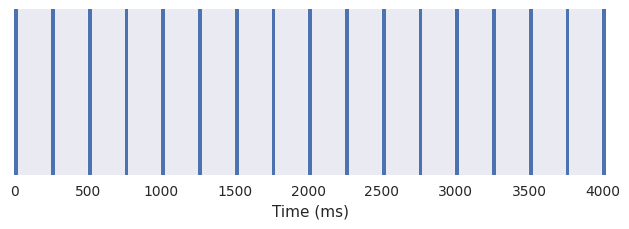

In [7]:
seq_slow.plot_sequence(x_axis_label="Time (ms)");

That looks fine. The final bar will be the target event. Time to make the stimuli. 

## Making the stimuli
According to the methods section there was 20-ms rise-and-decay time. Let's assume that's a linear 10 ms onramp and 10 ms offramp.

In [8]:
stim_short = SoundStimulus.generate(freq=440, duration_ms=71, onramp_ms=10, offramp_ms=10)
stim_long = SoundStimulus.generate(freq=440, duration_ms=125, onramp_ms=10, offramp_ms=10)

See what it looks like:

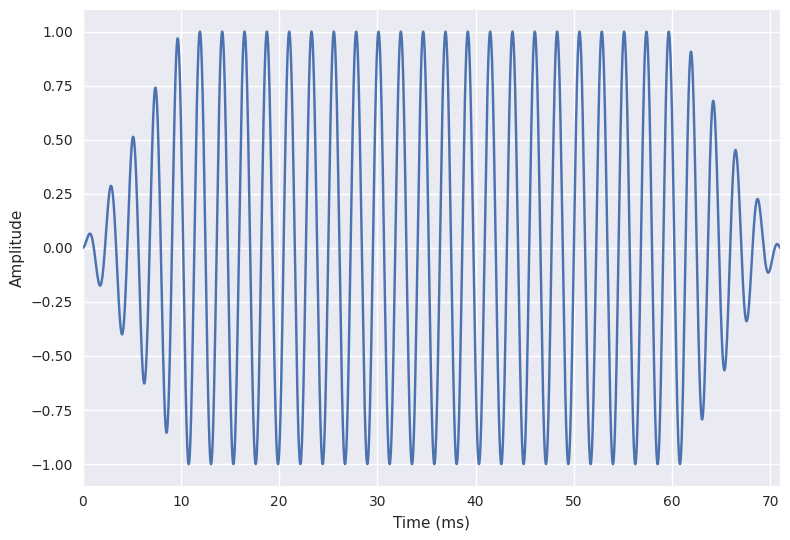

In [9]:
stim_short.plot_waveform();

Looks good. Now we will make the trials.



## Making the trials
We will now make the 4 types of trials. For the slow sequences, we need 16 tones plus one target stimulus. For the long sequences, we need 28 tones plus one target stimulus. There is an example target .wav file in *thebeat*'s resources. Below you'll see how to import it. If you want to use another file, instead of the whole block below you can simply use ``SoundStimulus.from_wav('yourfile.wav')``.

In [10]:
import importlib.resources as pkg_resources
import thebeat.resources

with pkg_resources.path(thebeat.resources, 'aas.wav') as target_path:
    target = SoundStimulus.from_wav(target_path)

# Let's adjust the amplitude of the target slightly
target.change_amplitude(1.7)

We first make lists for the stimuli. 16 or 28 times the created stimulus followed by one time the target.

In [11]:
stims_slowlong = [stim_long] * 16 + [target]
stims_slowshort = [stim_short] * 16 + [target]
stims_fastlong = [stim_long] * 28 + [target]
stims_fastshort = [stim_short] * 28 + [target]

# Let's print one to see what we have
print(stims_slowlong)

[SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=392.0625)]


In [12]:
trial_slowlong = SoundSequence(stims_slowlong, seq_slow, name="Slow trial with long sounds")
trial_slowshort = SoundSequence(stims_slowshort, seq_slow)
trial_fastlong = SoundSequence(stims_fastlong, seq_fast)
trial_fastshort = SoundSequence(stims_fastshort, seq_fast)

That's it! We can plot these trials (``.plot_waveform()`` or ``.plot_sequence()``), we can play them (``.play()``) or we can write them to file (``.write_wav()``).

We'll only plot it here.

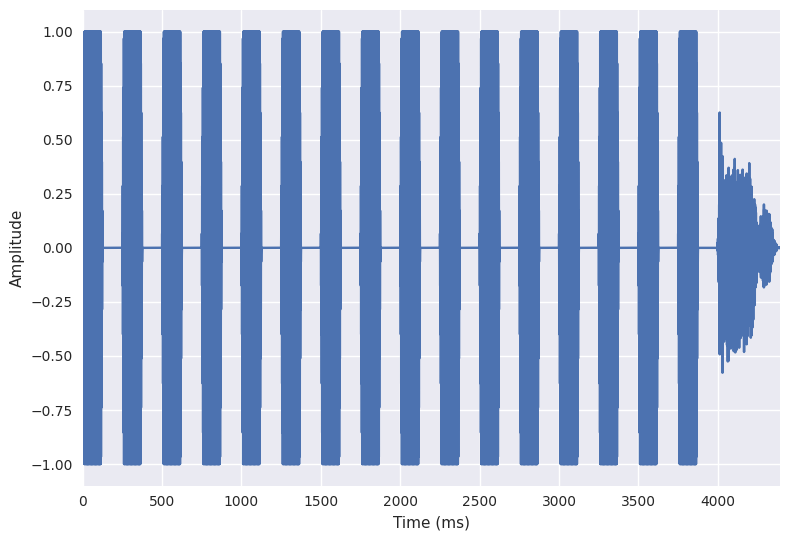

In [13]:
trial_slowlong.plot_waveform();

In [14]:
# You can listen to the sound here. You can ignore this code, it's only for this website.
# In your Python editor you would simply use e.g. trial_slowlong.play()
from IPython.display import Audio
Audio(data=trial_slowlong.samples, rate=trial_slowlong.fs)

## Code summary

In [15]:
from thebeat.core import Sequence, SoundStimulus, SoundSequence
import numpy as np
import importlib.resources as pkg_resources
import thebeat.resources

rng = np.random.default_rng(seed=123)

seq_slow = Sequence.generate_isochronous(n_events=17, ioi=250)
seq_fast = Sequence.generate_isochronous(n_events=29, ioi=1000/7)

stim_short = SoundStimulus.generate(freq=440, duration_ms=71, onramp_ms=10, offramp_ms=10)
stim_long = SoundStimulus.generate(freq=440, duration_ms=125, onramp_ms=10, offramp_ms=10)

with pkg_resources.path(thebeat.resources, 'aas.wav') as target_path:
    target = SoundStimulus.from_wav(target_path)

stims_slowlong = [stim_long] * 16 + [target]
stims_slowshort = [stim_short] * 16 + [target]
stims_fastlong = [stim_long] * 28 + [target]
stims_fastshort = [stim_short] * 28 + [target]

trial_slowlong = SoundSequence(stims_slowlong, seq_slow)
trial_slowshort = SoundSequence(stims_slowshort, seq_slow)
trial_fastlong = SoundSequence(stims_fastlong, seq_fast)
trial_fastshort = SoundSequence(stims_fastshort, seq_fast)